<a href="https://colab.research.google.com/github/LAMECH9/LAMECH9/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

In [ ]:
# Load Califonia Housing dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
df["PRICE"] = california.target # Target variable (median House Value)

In [ ]:
# Display first few rows
print("Dataset preview:")
print(df.head())

Dataset preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


In [ ]:
# Summary Statistics
print("\nDataset summary:")
print(df.describe())


Dataset summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.6

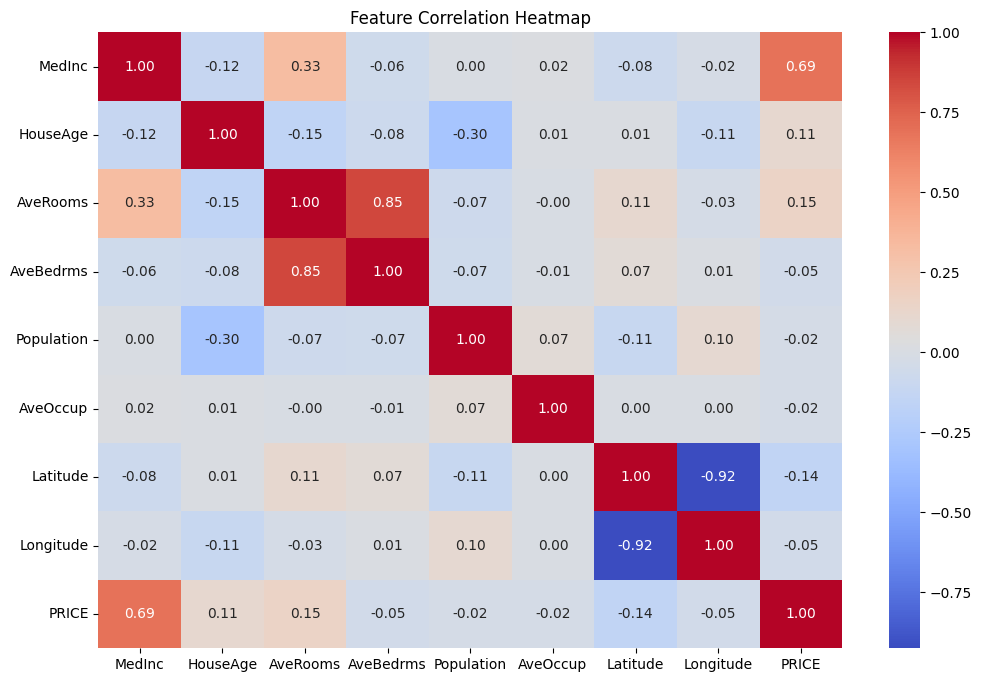

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Split dataset into features (x) and target (y)
x = df.drop("PRICE", axis=1) # Independent variable
y = df["PRICE"] # Dependent variable

In [ ]:
# Train-test split (80% training, 20% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling (standardization)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# Train the multiple linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# Predictions
y_pred = model.predict(x_test_scaled)

In [ ]:
# Model Evaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
# AIC and BIC Calculation (using statsmodels)
x_train_const = sm.add_constant(x_train_scaled) # Add intercept
ols_model = sm.OLS(y_train, x_train_const).fit()
aic = ols_model.aic
bic = ols_model.bic

In [ ]:
# Print performance metrics
print("\nModel Evaluation Metrics:")
print(f"R-squared (R2): {r2:.4}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Akaike Information Criterion (AIC): {aic:.4f}")
print(f"Bayesian Information Criterion (BIC): {bic:.4f}")


Model Evaluation Metrics:
R-squared (R2): 0.5758
Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5332
Root Mean Squared Error (RMSE): 0.7456
Akaike Information Criterion (AIC): 36013.6303
Bayesian Information Criterion (BIC): 36083.0369


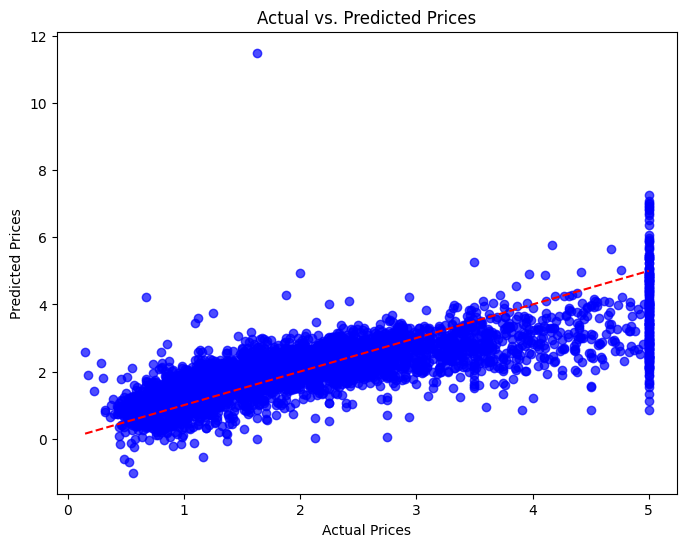

In [ ]:
# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--") # Line y=x
plt.show()

In [ ]:
 2#---NEW FEATURE INPUT PREDICTION---
print("\nEnter feature values to predict house price")

# Prompt user to enter values for all features
user_input = []
for feature in x.columns:
    value = float(input(f"Enter value for {feature}: "))
    user_input.append(value)

# Convert user input into a Numpy array and scale it
user_input_array = np.array(user_input).reshape(1, -1)
user_input_scaled = scaler.transform(user_input_array)

# Predict house price
predicted_price = model.predict(user_input_scaled)
print(f"\nPredicted House Price: {predicted_price[0]:,.2f}")


Enter feature values to predict house price
Enter value for MedInc: 0
Enter value for HouseAge: 1
Enter value for AveRooms: 2
Enter value for AveBedrms: 3
Enter value for Population: 4
Enter value for AveOccup: 5
Enter value for Latitude: 0
Enter value for Longitude: 1

Predicted House Price: -35.36


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
